In [1]:
import sys
sys.path.append('../')
import importlib
import model.op
importlib.reload(model.op)
from model.op import number_aircrafts_lp

## Default parameters in LP

- Timestep: 5 min

- Flight time tau: 2 timesteps

- Kappa: 10% charge, 2 levels of SOC

- Gamma: 16 SOCs


## Policy Visualization

#### Number of charging at each time steps

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import model.ParseLP
importlib.reload(model.ParseLP)
from model.ParseLP import convert2df, plot_charging_policy, plot_SOC_demand_time

In [26]:
kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# zero charging time
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108
flight_time = 2
tau = tau_list[0]
tau = np.array(tau)
tau = tau / 5
tau = np.ceil(tau)
tau = tau.astype(int)
print(tau)
output_file = 'output_' + str((0+1)*12) + '_miles_10min'
specificn, specificu, specificc = convert2df(output_file)
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

[[0 2]
 [2 0]]


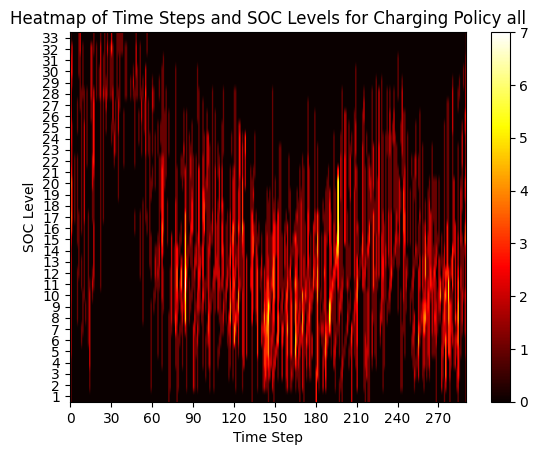

In [27]:
plot_charging_policy(specificc, 'all')

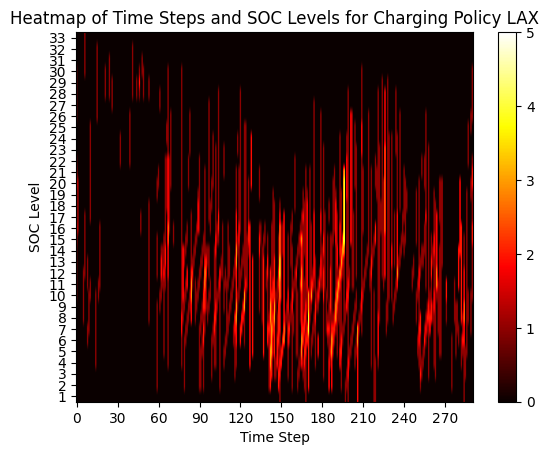

In [28]:
plot_charging_policy(specificc01, 'LAX')

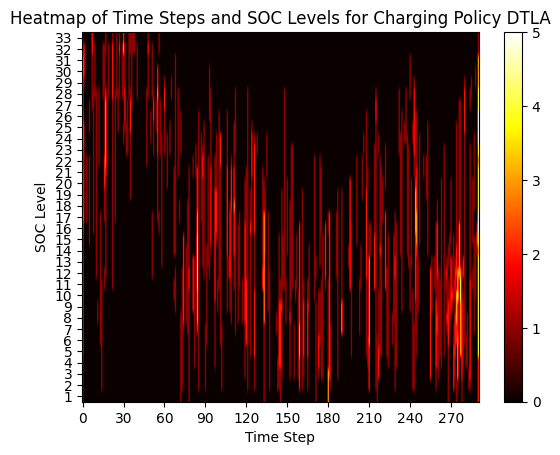

In [29]:
plot_charging_policy(specificc10, 'DTLA')

#### Whole system's SOC vs Demand

In [3]:
output_file = 'output_' + str((0+1)*12) + '_miles_10min'
specificn, specificu, specificc = convert2df(output_file)
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)


In [7]:
demand = pd.read_csv('../input/paxArrivalDf.csv')
demand['passenger_arrival_time'] = (demand['passenger_arrival_time'] // (5 * 60)).astype(int)
demand = demand.groupby('passenger_arrival_time').count().reset_index()

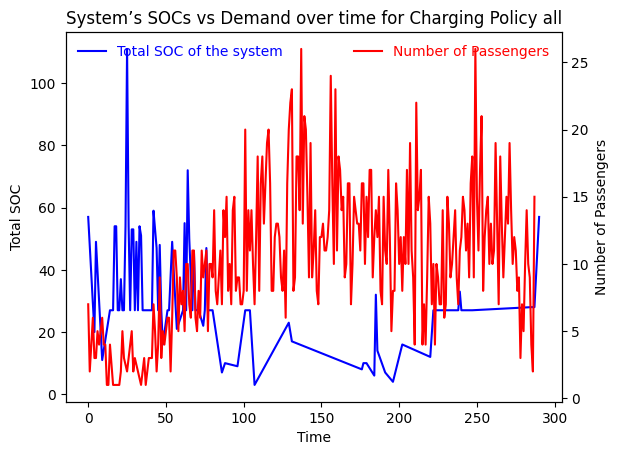

In [8]:
plot_SOC_demand_time(specificn, demand, 'all')

In [10]:
demand = pd.read_csv('../input/paxArrivalDf.csv')
demandLAX = demand[demand['origin_vertiport_id'] == 'LAX']
demandLAX['passenger_arrival_time'] = (demandLAX['passenger_arrival_time'] // (5 * 60)).astype(int)
demandLAX = demandLAX.groupby('passenger_arrival_time').count().reset_index()

/var/folders/6n/l9s50q1j7d97405nlg3xkn000000gn/T/ipykernel_80989/69036008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demandLAX['passenger_arrival_time'] = (demandLAX['passenger_arrival_time'] // (5 * 60)).astype(int)


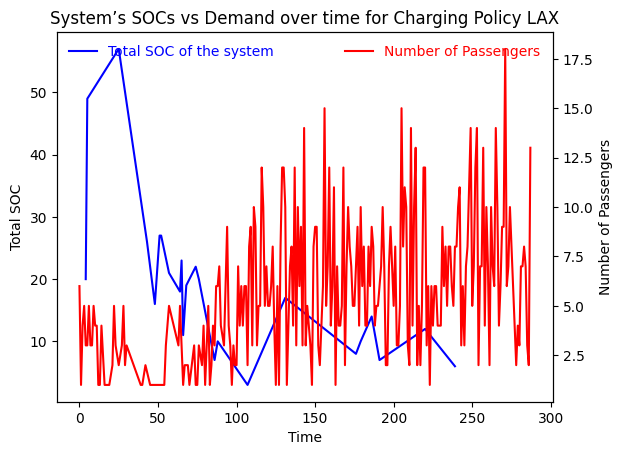

In [15]:
plot_SOC_demand_time(specificn01, demandLAX, 'LAX')

In [16]:
demand = pd.read_csv('../input/paxArrivalDf.csv')
demandDTLA = demand[demand['origin_vertiport_id'] == 'DTLA']
demandDTLA['passenger_arrival_time'] = (demandDTLA['passenger_arrival_time'] // (5 * 60)).astype(int)
demandDTLA = demandDTLA.groupby('passenger_arrival_time').count().reset_index()

/var/folders/6n/l9s50q1j7d97405nlg3xkn000000gn/T/ipykernel_80989/75848569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demandDTLA['passenger_arrival_time'] = (demandDTLA['passenger_arrival_time'] // (5 * 60)).astype(int)


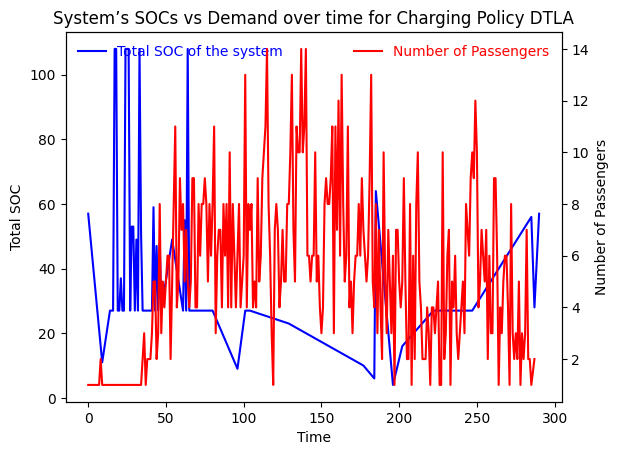

In [17]:
plot_SOC_demand_time(specificn10, demandDTLA, 'DTLA')

# Run LP

In [172]:
number_aircrafts_lp(schedule='schedule_10min_0610', schedule_time_step=288, output_path='testingfunction')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-21
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 21490 rows, 345708 columns and 703634 nonzeros
Model fingerprint: 0x0a13d527
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 1931 rows and 7241 columns
Presolve time: 1.29s
Presolved: 19559 rows, 338467 columns, 690069 nonzeros
Variable types: 0 continuous, 338467 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time

# LP Output Visualization

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import model.ParseLP
importlib.reload(model.ParseLP)
from model.ParseLP import convert2df, calculate_num_aircrafts

In [48]:
len(gamma)

32

13.0
15.0
19.0
23.0
27.0
32.0
35.0
38.0
42.0


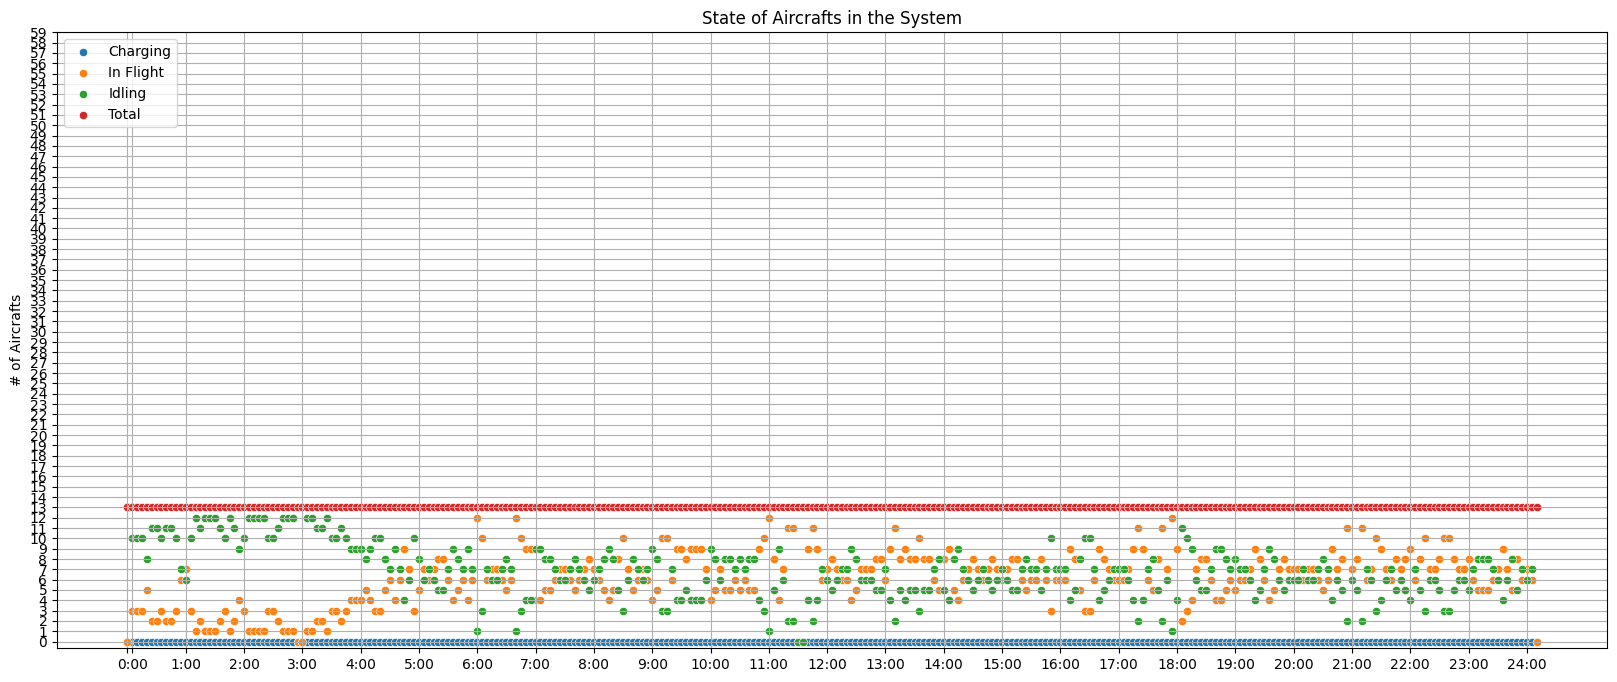

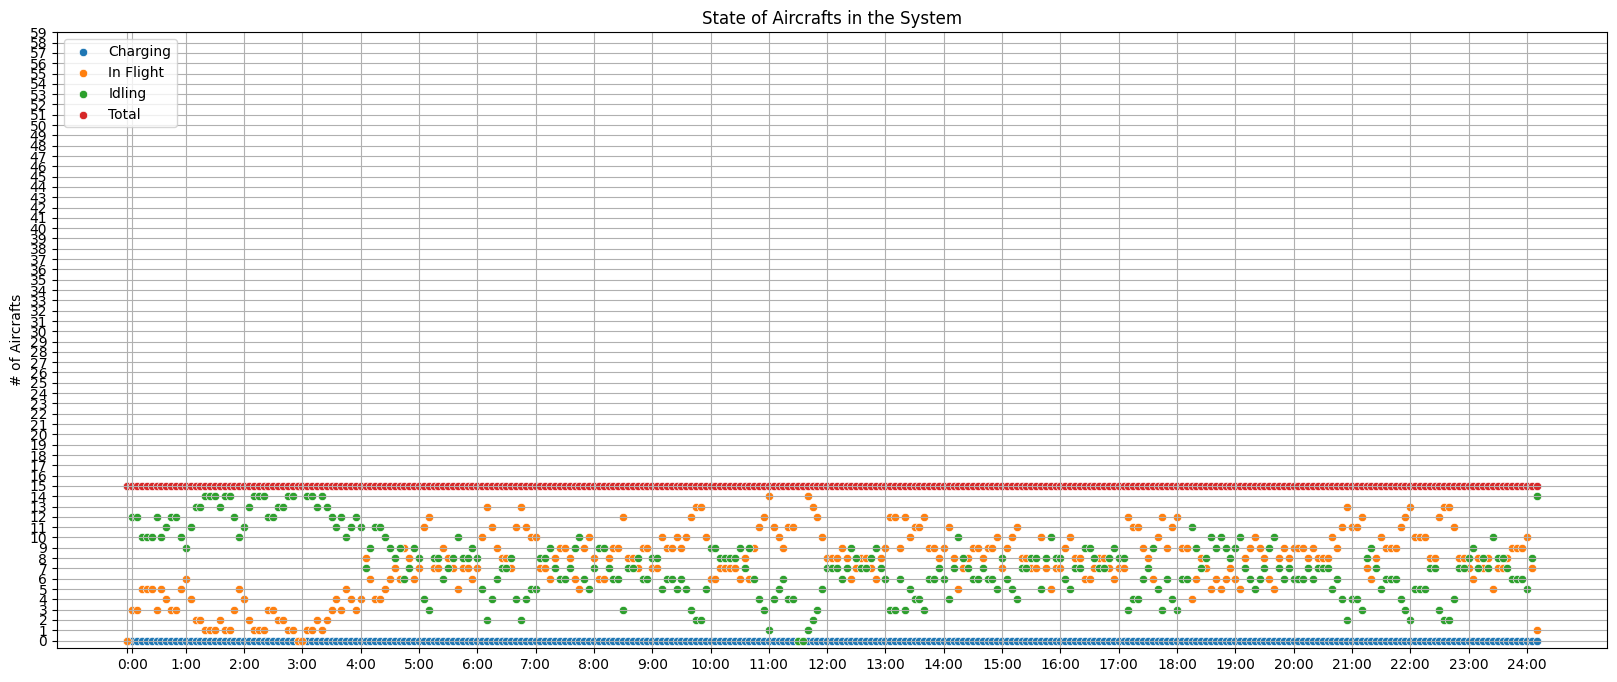

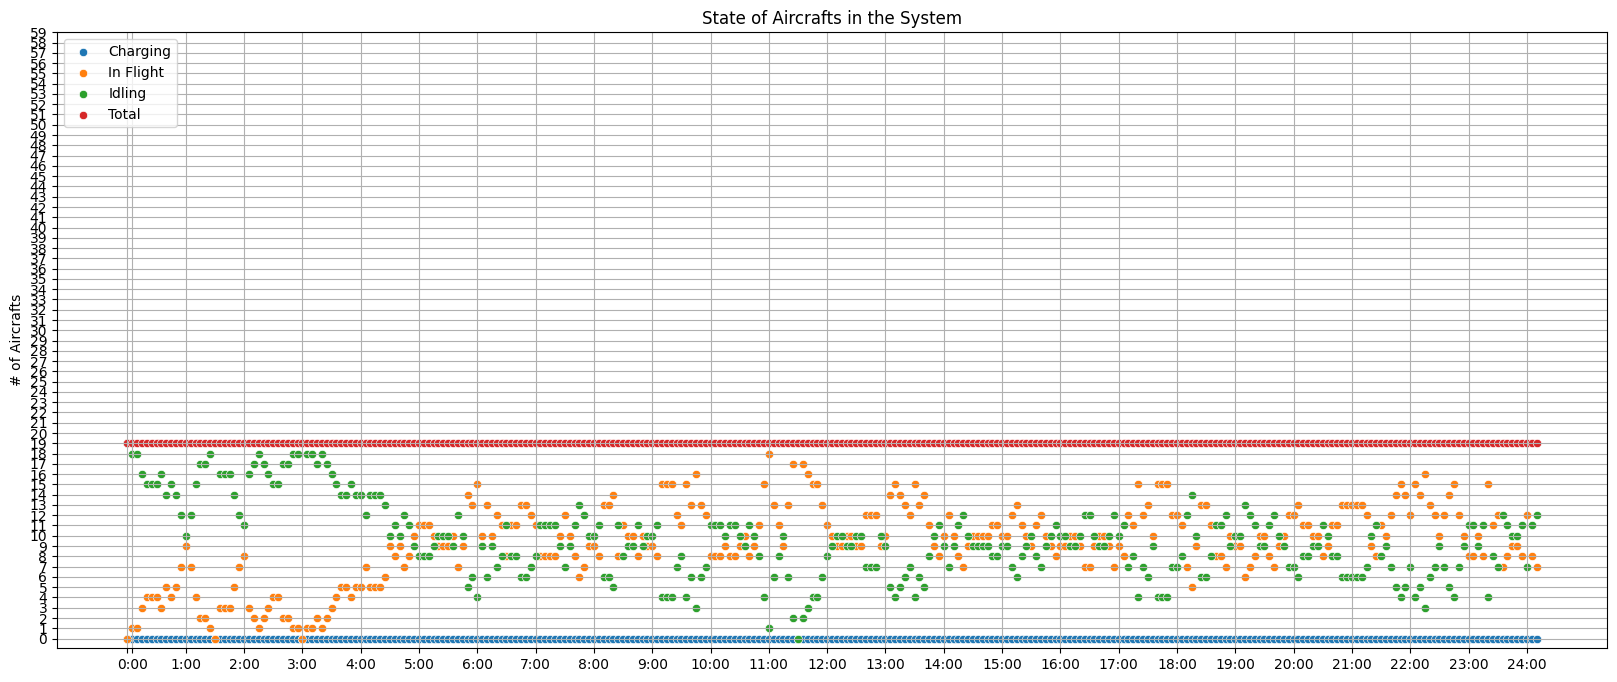

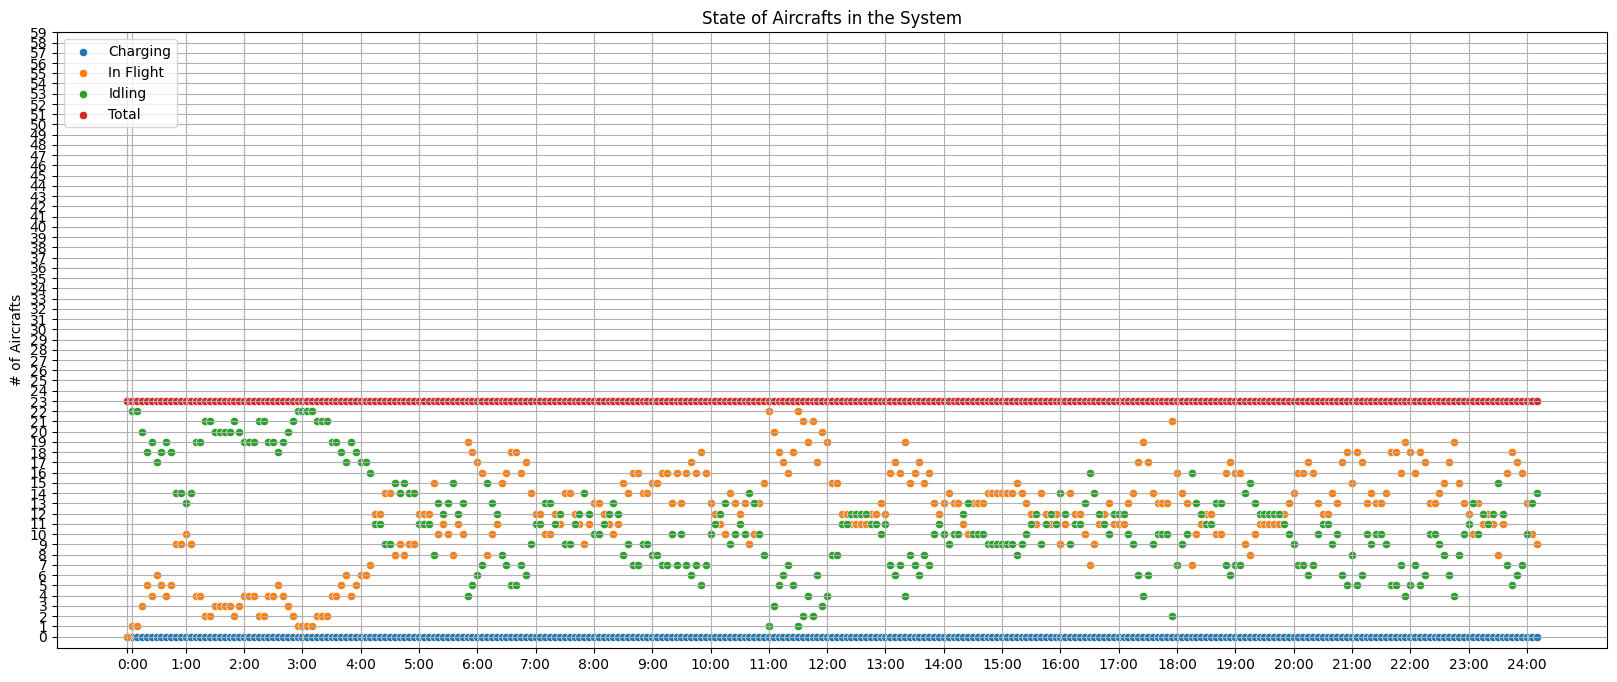

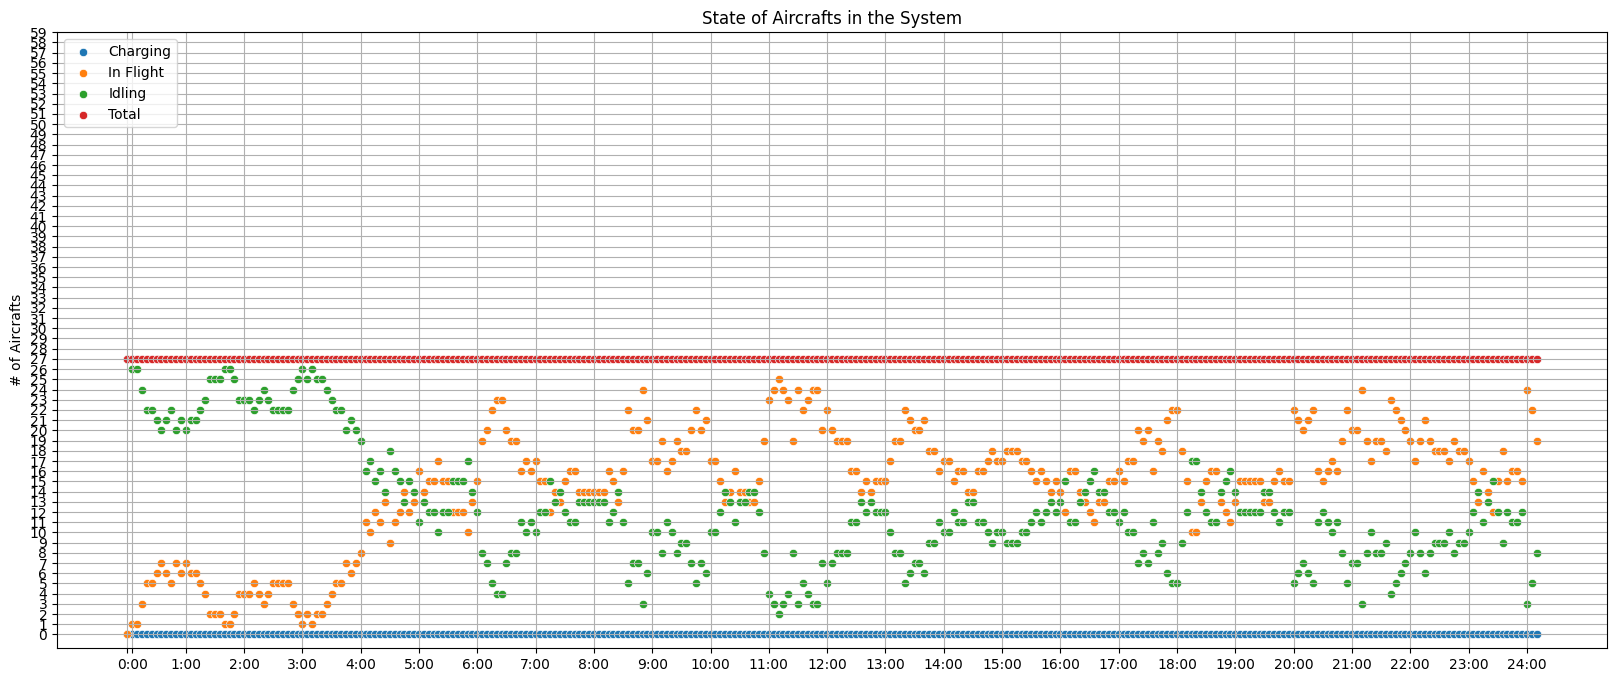

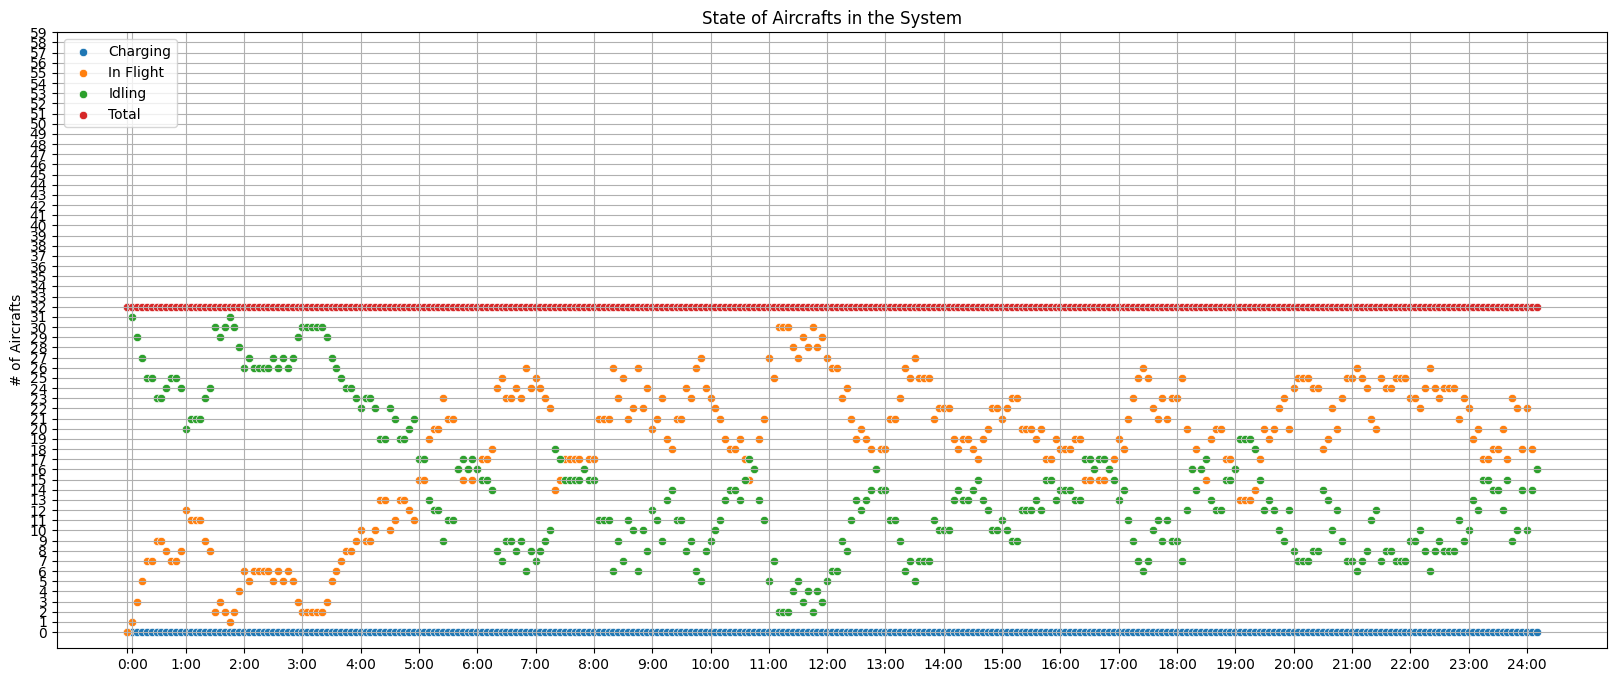

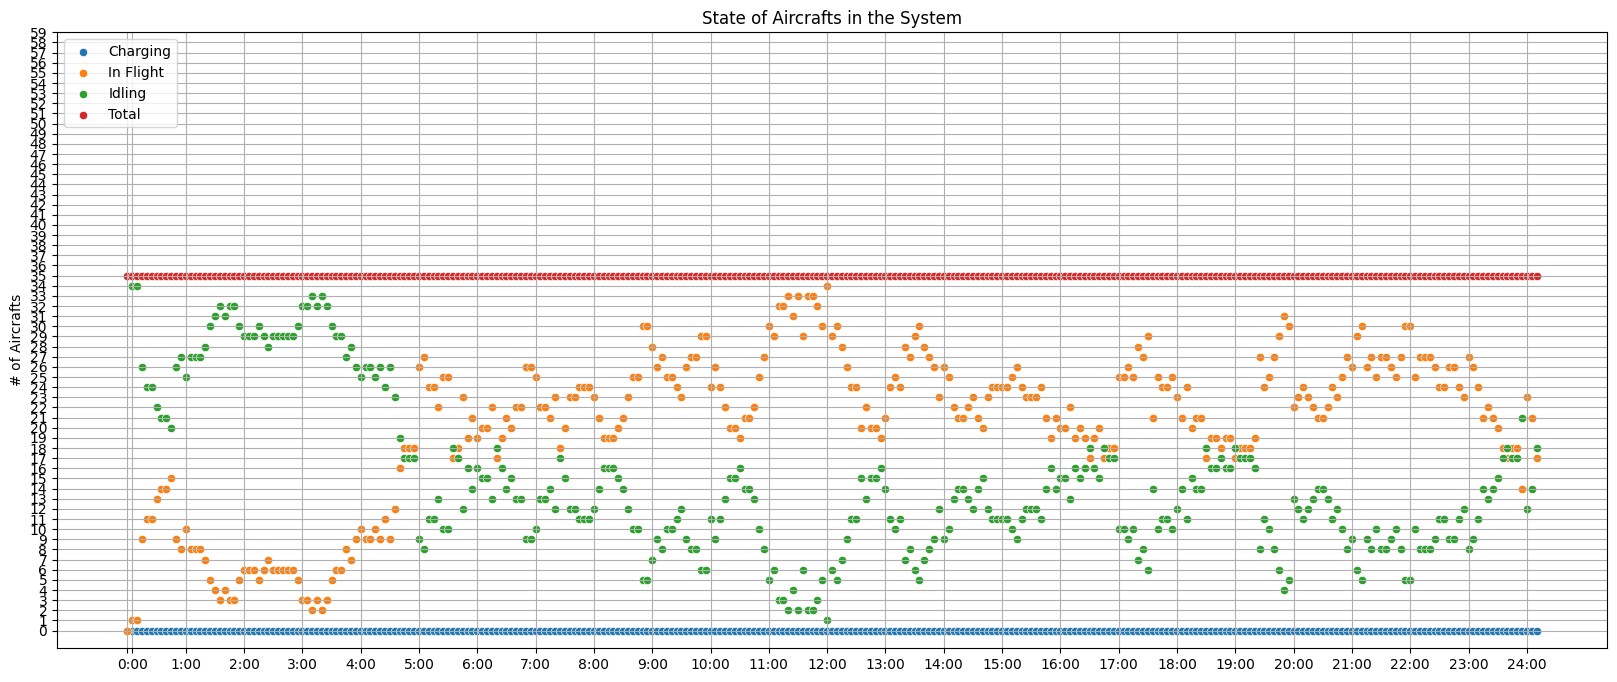

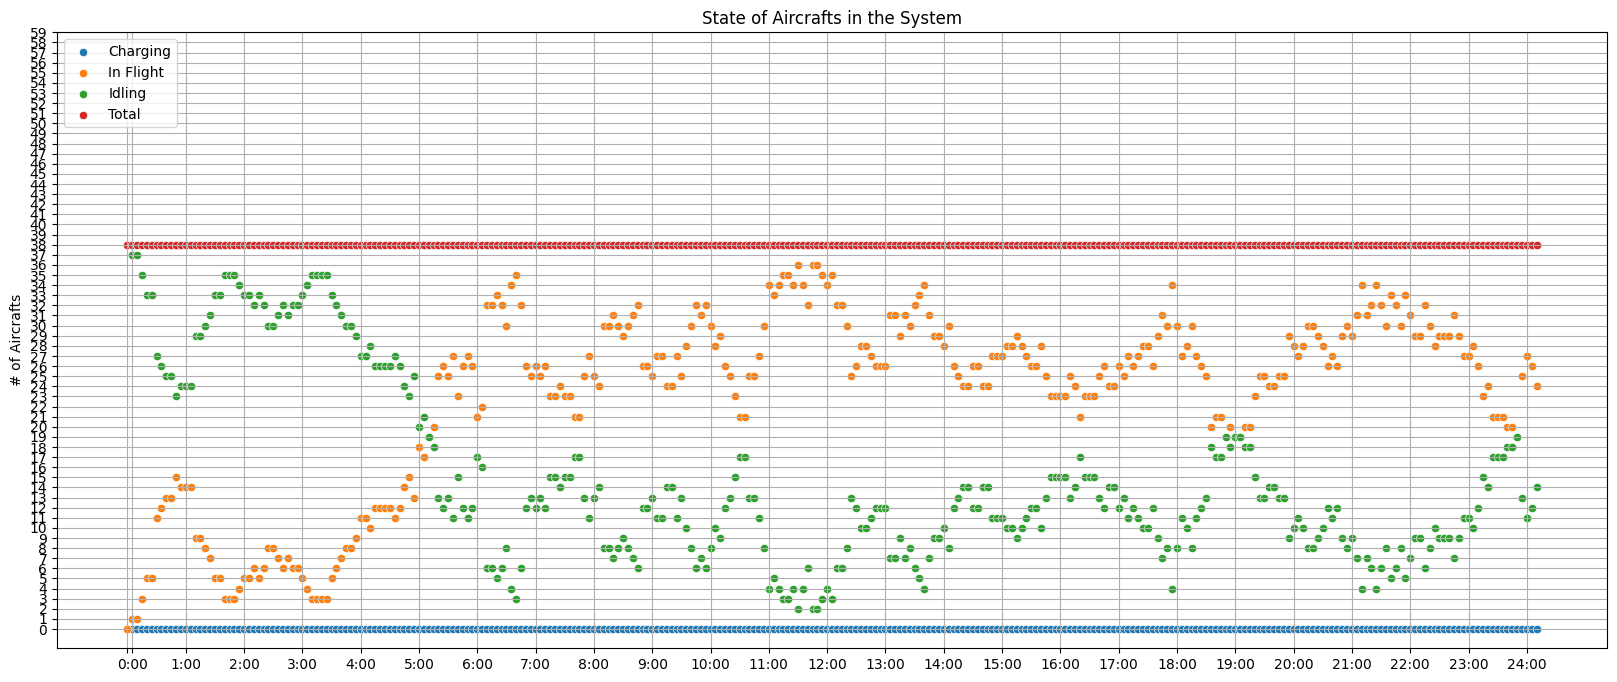

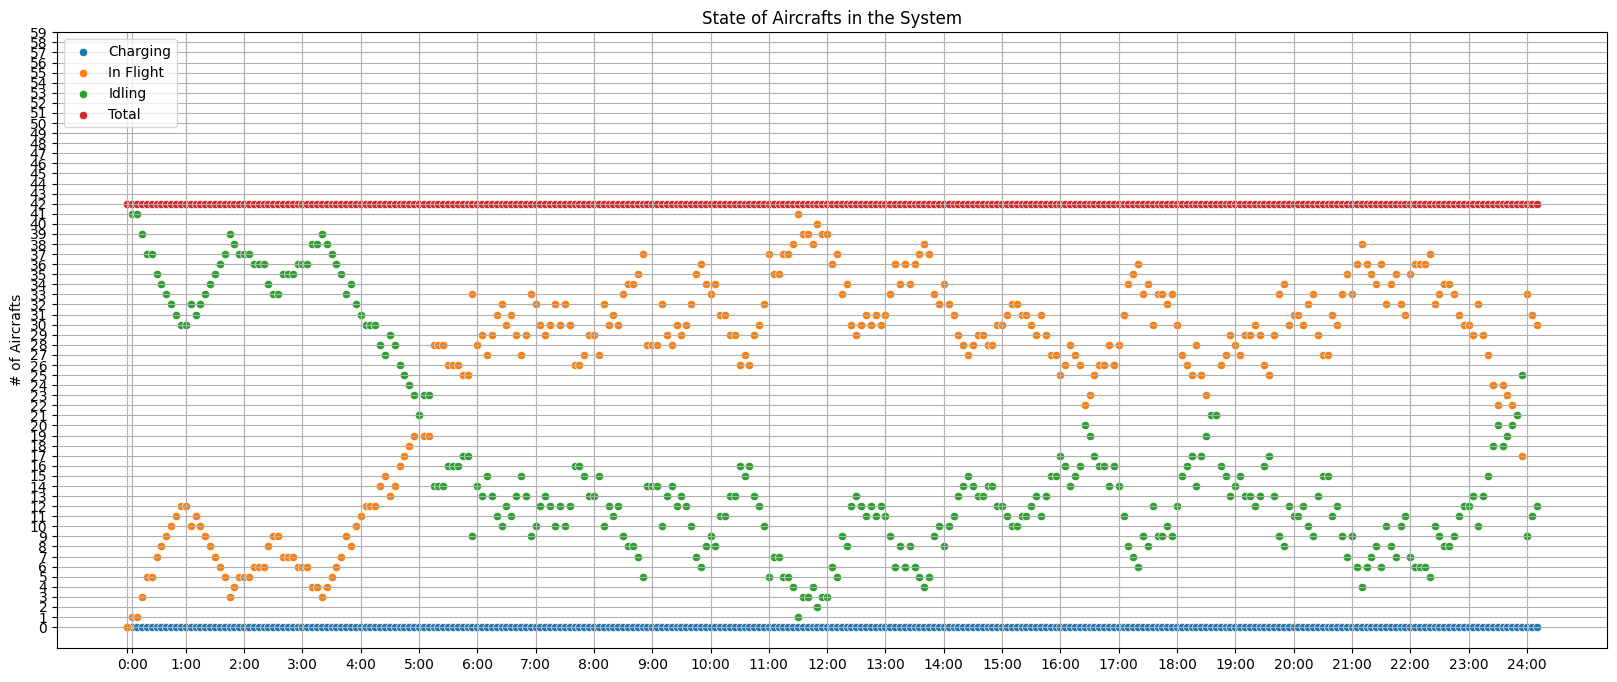

In [66]:
kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# zero charging time
gamma = np.array([
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,
])*60
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108
for i in range(len(kappa_list)):
    tau = np.array(tau_list[i])
    tau = np.ceil(tau / 5)
    tau = tau.astype(int)
    output_file = 'output_' + str((i+1)*12) + '_miles_10min_zero_charging'
    specificn, specificu, specificc = convert2df(output_file)
    # Obtain Airport Specific Aircraft States
    specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
    specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

    specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
    specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

    specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
    specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)
    lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01, gamma=gamma, flight_time=tau)
    dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10, gamma=gamma, flight_time=tau)
    all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn, gamma=gamma, flight_time=tau)
    x0=0
    x1=291

    fig, ax = plt.subplots(figsize=(20,8))
    sns.scatterplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
    sns.scatterplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
    sns.scatterplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
    sns.scatterplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
    # ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
    # ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
    ax.set(title='State of Aircrafts in the System',
        ylabel='# of Aircrafts',
        yticks=np.arange(0, 60),
        xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
        xticklabels=['']+[str(i)+':00' for i in range(0,25)])
    plt.grid()
    plt.legend(loc='upper left');
    plt.savefig('../output/output_' + str((i+1)*12) + '_miles_10min_zero_charging.png')
    print((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1])[0])
    # plt.xlim([0, 10])

14.0
16.0
19.0
26.0
32.0
38.0
43.0
48.0
60.0


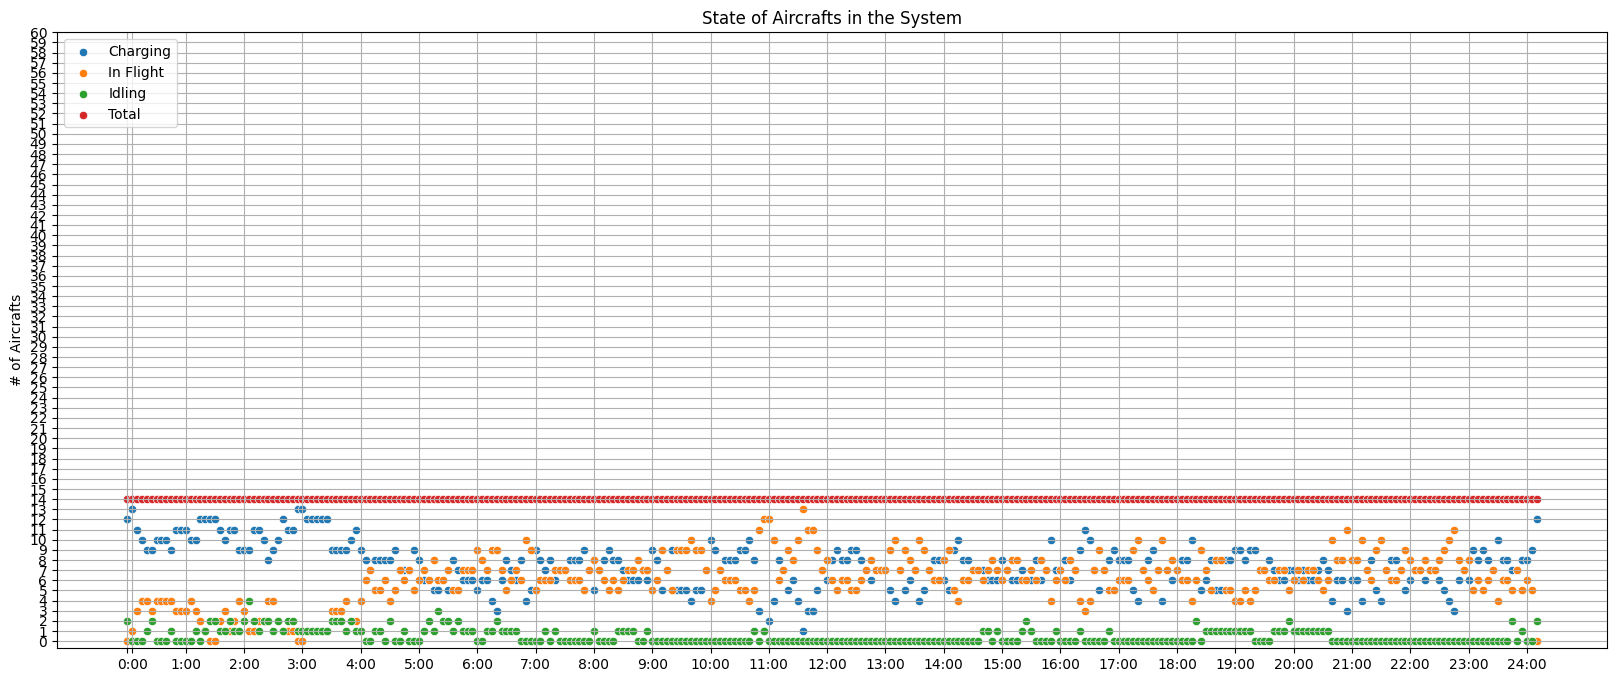

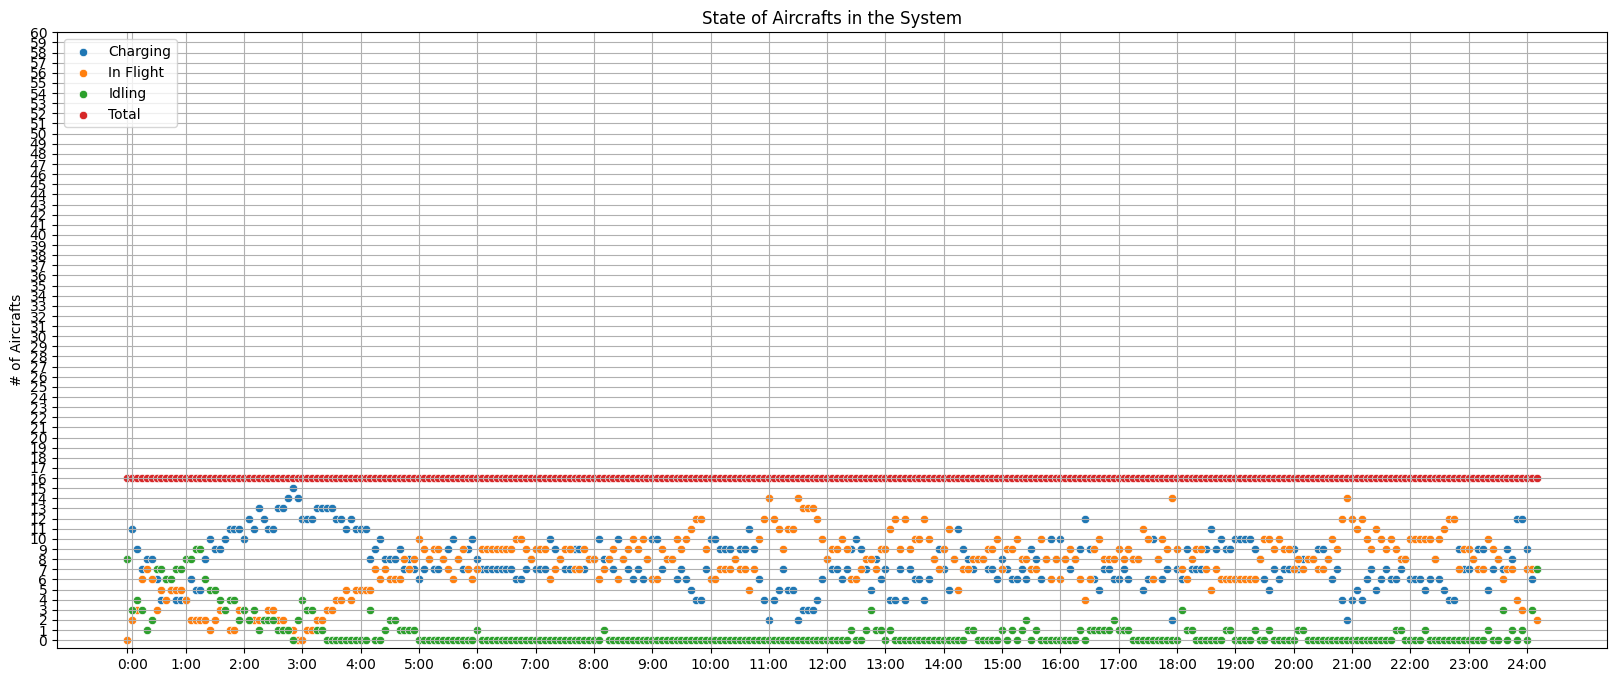

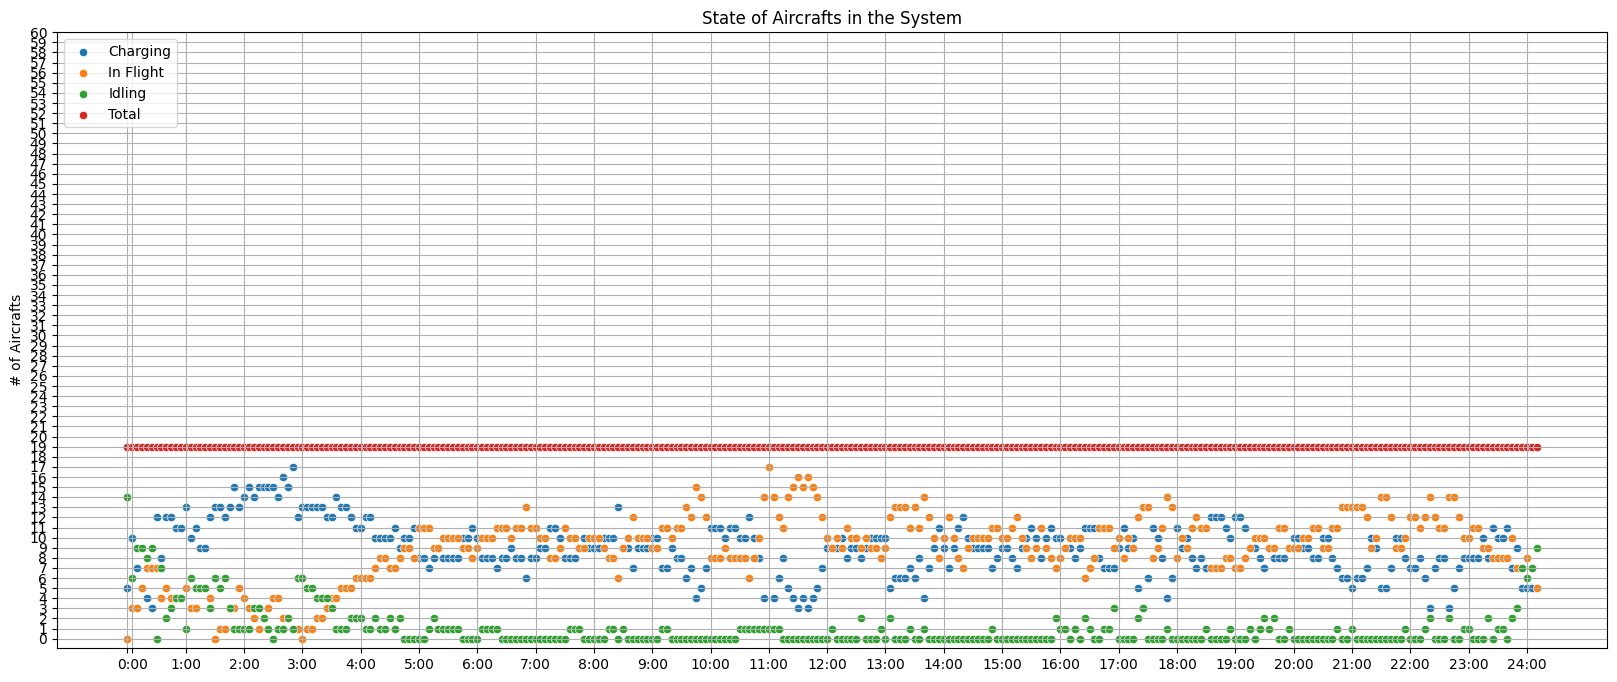

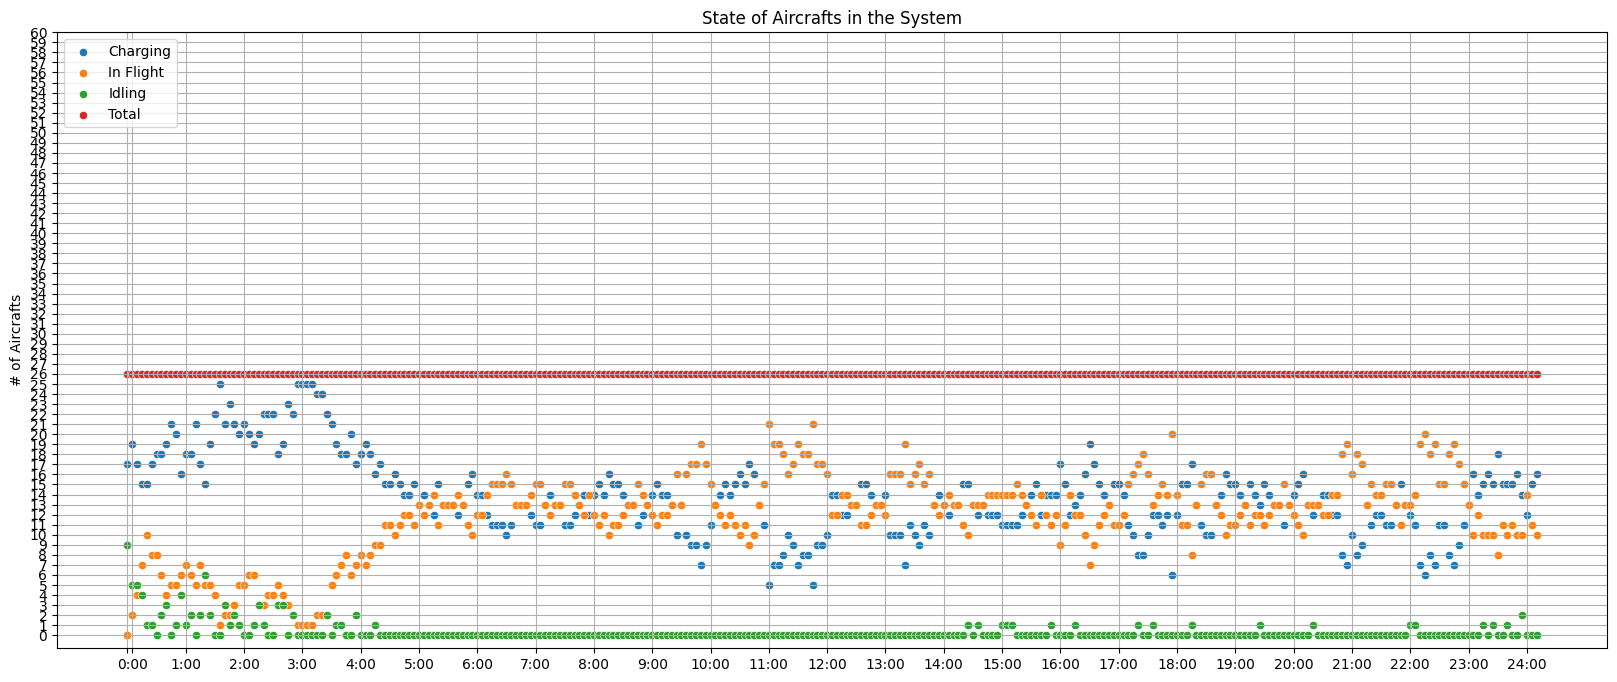

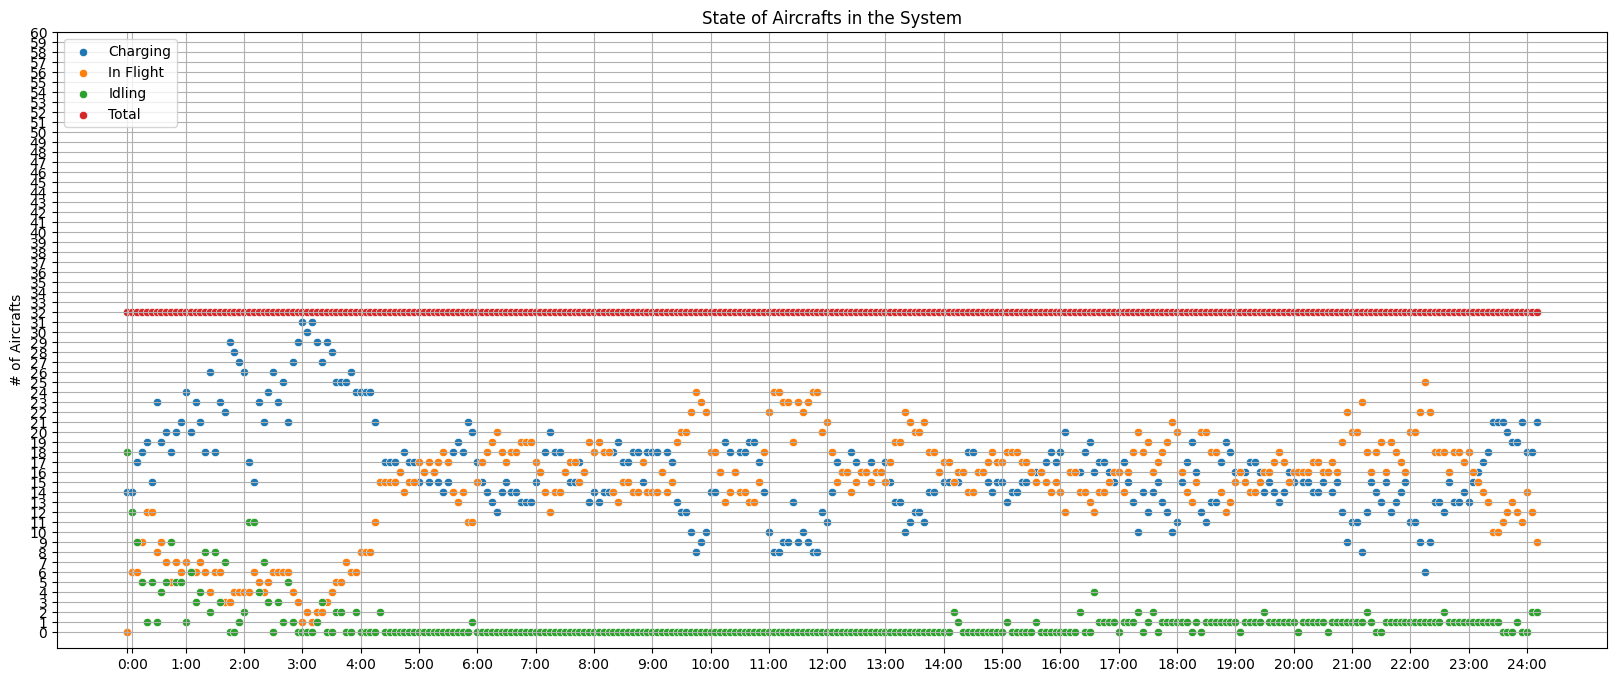

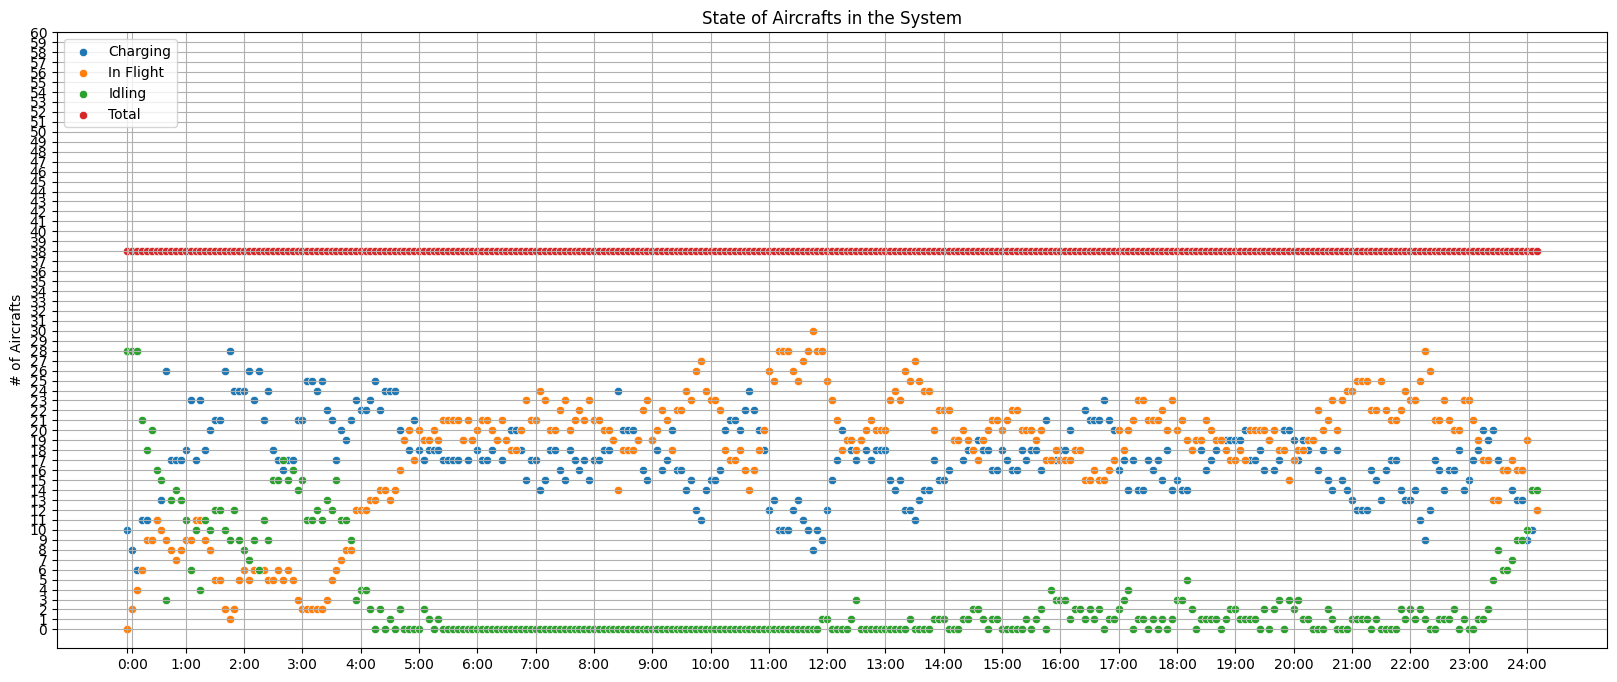

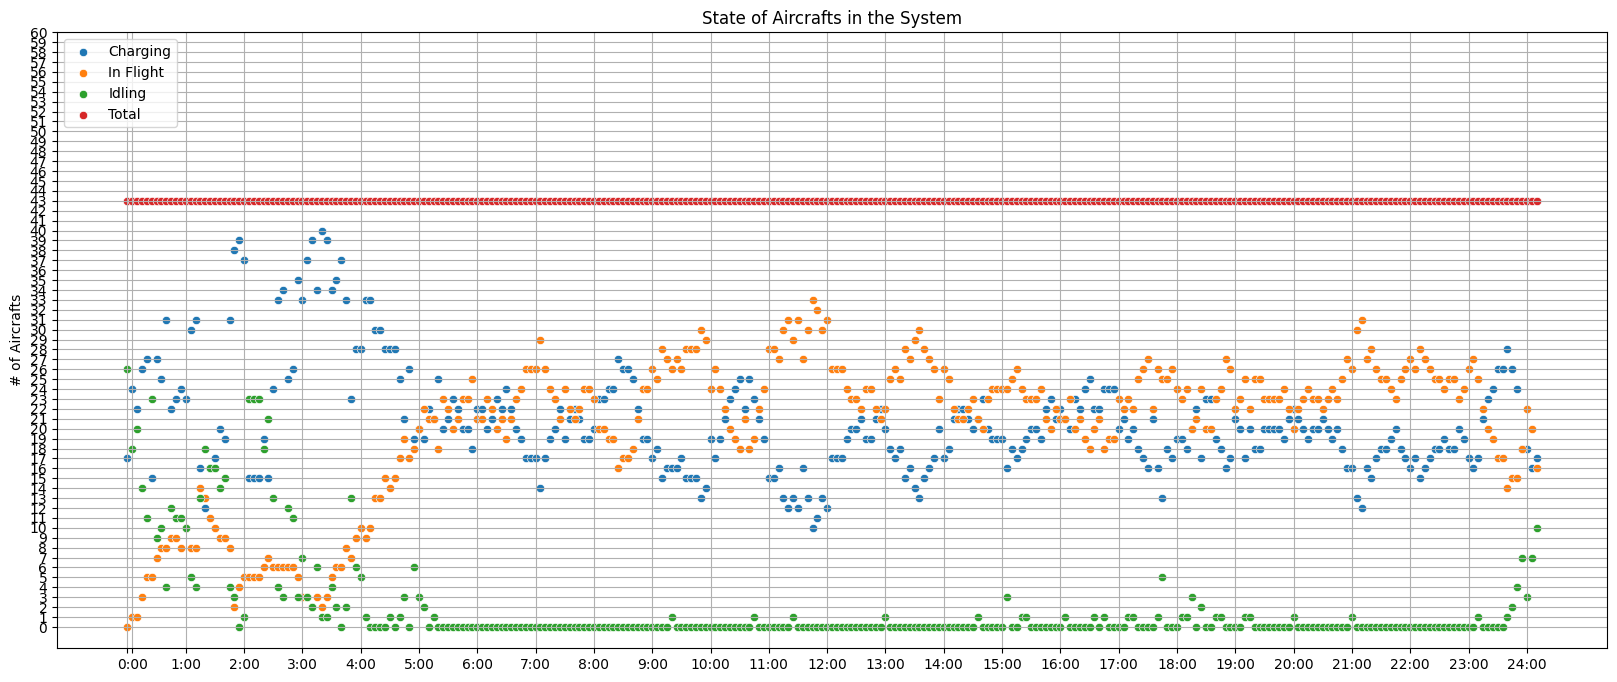

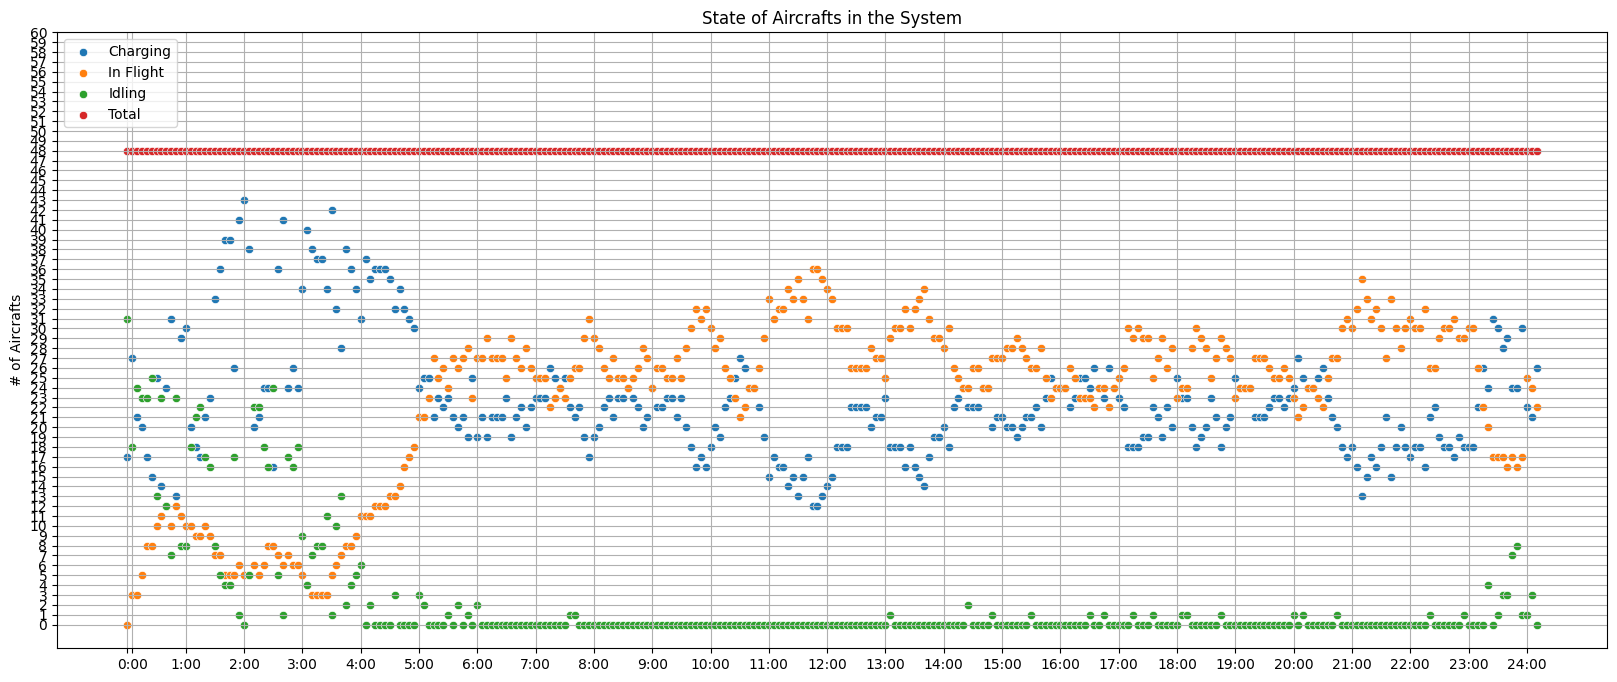

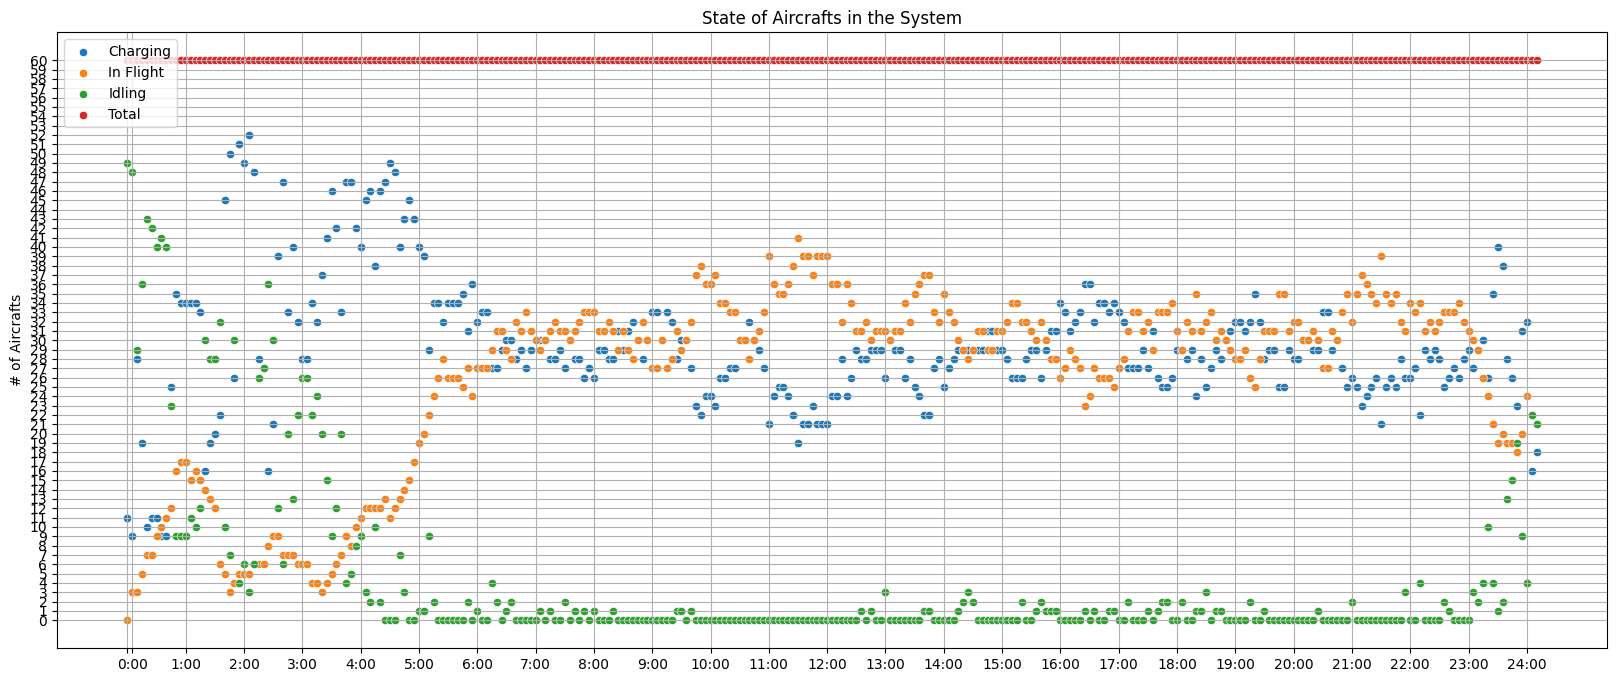

In [67]:
kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
gamma = np.array([
0.0129,0.0133,0.0137,0.0142,0.0147,
0.0153,0.0158,0.0166,0.0172,0.018,
0.0188,0.0197,0.0207,0.0219,0.0231,
0.0245,0.026,0.0278,0.03,0.0323,
0.0351,0.0384,0.0423,0.0472,0.0536,
0.0617,0.0726,0.0887,0.1136,0.1582,
0.2622,0.9278,
])*60
tau_list = [[[0, 5.92], [5.85, 0]], # 12
            [[0, 9.82], [10.59, 0]], # 24
            [[0, 13.40], [13.59, 0]], # 36
            [[0, 19.35], [19.39, 0]], # 48
            [[0, 23.47], [23.67, 0]], # 60
            [[0, 28.19], [28.20, 0]], # 72
            [[0, 32.17], [32.39, 0]], # 84
            [[0, 36.50], [36.75, 0]], # 96
            [[0, 41.40], [41.37, 0]]] # 108
for i in range(len(kappa_list)):
    tau = np.array(tau_list[i])
    tau = np.ceil(tau / 5)
    tau = tau.astype(int)
    output_file = 'output_' + str((i+1)*12) + '_miles_10min'
    specificn, specificu, specificc = convert2df(output_file)
    # Obtain Airport Specific Aircraft States
    specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
    specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

    specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
    specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

    specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
    specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)
    lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01, gamma=gamma, flight_time=tau)
    dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10, gamma=gamma, flight_time=tau)
    all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn, gamma=gamma, flight_time=tau)
    x0=0
    x1=291

    fig, ax = plt.subplots(figsize=(20,8))
    sns.scatterplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
    sns.scatterplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
    sns.scatterplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
    sns.scatterplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
    # ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
    # ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
    ax.set(title='State of Aircrafts in the System',
        ylabel='# of Aircrafts',
        yticks=np.arange(0, 61),
        xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
        xticklabels=['']+[str(i)+':00' for i in range(0,25)])
    plt.grid()
    plt.legend(loc='upper left');
    plt.savefig('../output/output_' + str((i+1)*12) + '_miles_10min.png')
    print((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1])[0])
    # plt.xlim([0, 10])

In [68]:
from tqdm import tqdm

In [70]:
import imageio

filenames = []
images = []
for i in range(len(kappa_list)):
    # ... your existing code ...

    # Save the filename of each image to the list
    filenames.append('../output/output_' + str((i+1)*12) + '_miles_10min_zero_charging.png')
for j in tqdm(range(100)): 
    for filename in filenames:
        images.append(imageio.imread(filename))
imageio.mimsave('../output/zeroCharging.gif', images, duration=0.00001)


  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/6n/l9s50q1j7d97405nlg3xkn000000gn/T/ipykernel_44733/2405565339.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


# State Visulization

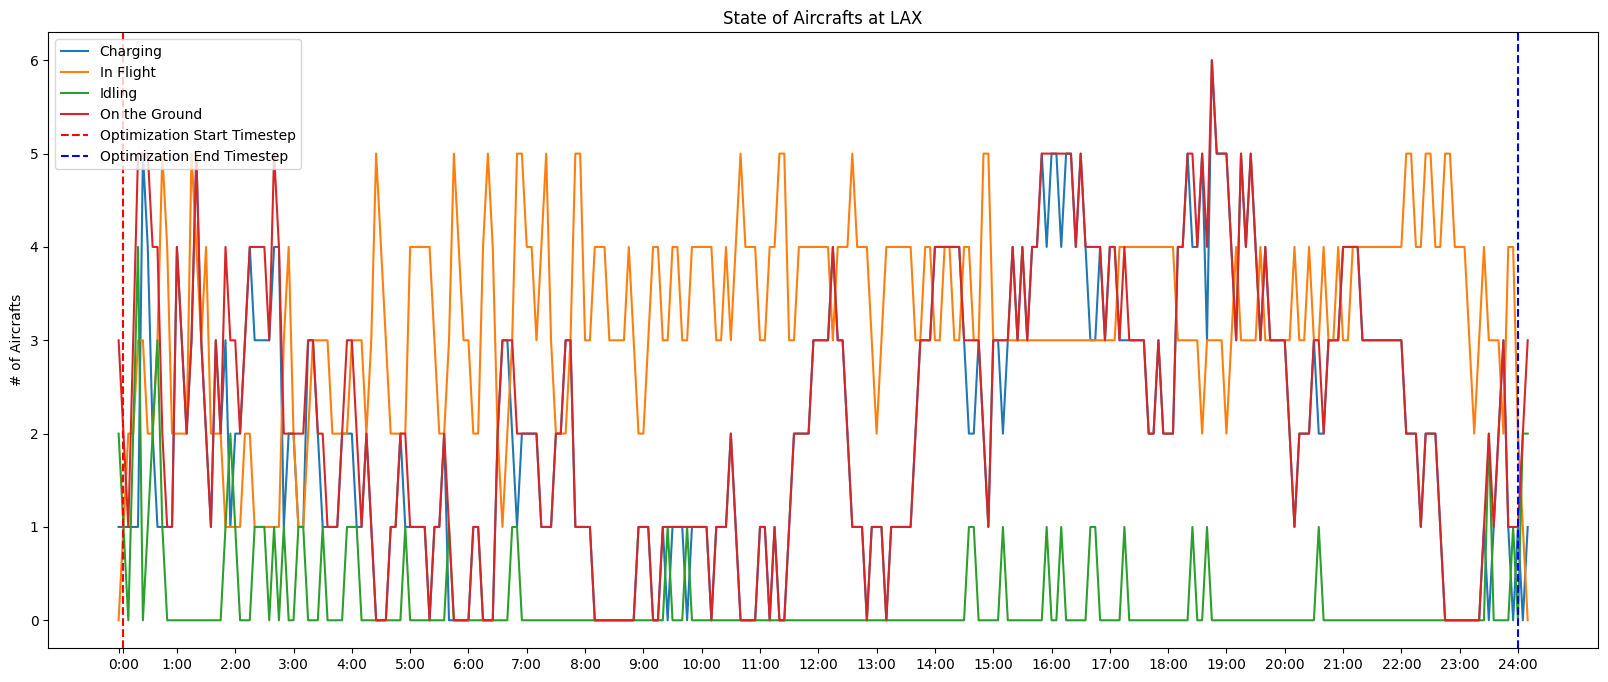

In [6]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(lax_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(lax_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(lax_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((lax_all_c.sum(axis=0)[x0:x1] + lax_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at LAX',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [7]:
print('At t = 0, c =', lax_all_c.sum(axis=0)[x0:x1][0], '; u=', lax_all_u.sum(axis=0)[x0:x1][0], '; n=', lax_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', lax_all_c.sum(axis=0)[x0:x1][286], '; u=', lax_all_u.sum(axis=0)[x0:x1][286], '; n=', lax_all_n.sum(axis=0)[x0:x1][286])

At t = 0, c = 1.0 ; u= 0.0 ; n= 2.0
At t = 290, c = 1.0 ; u= 4.0 ; n= 0.0


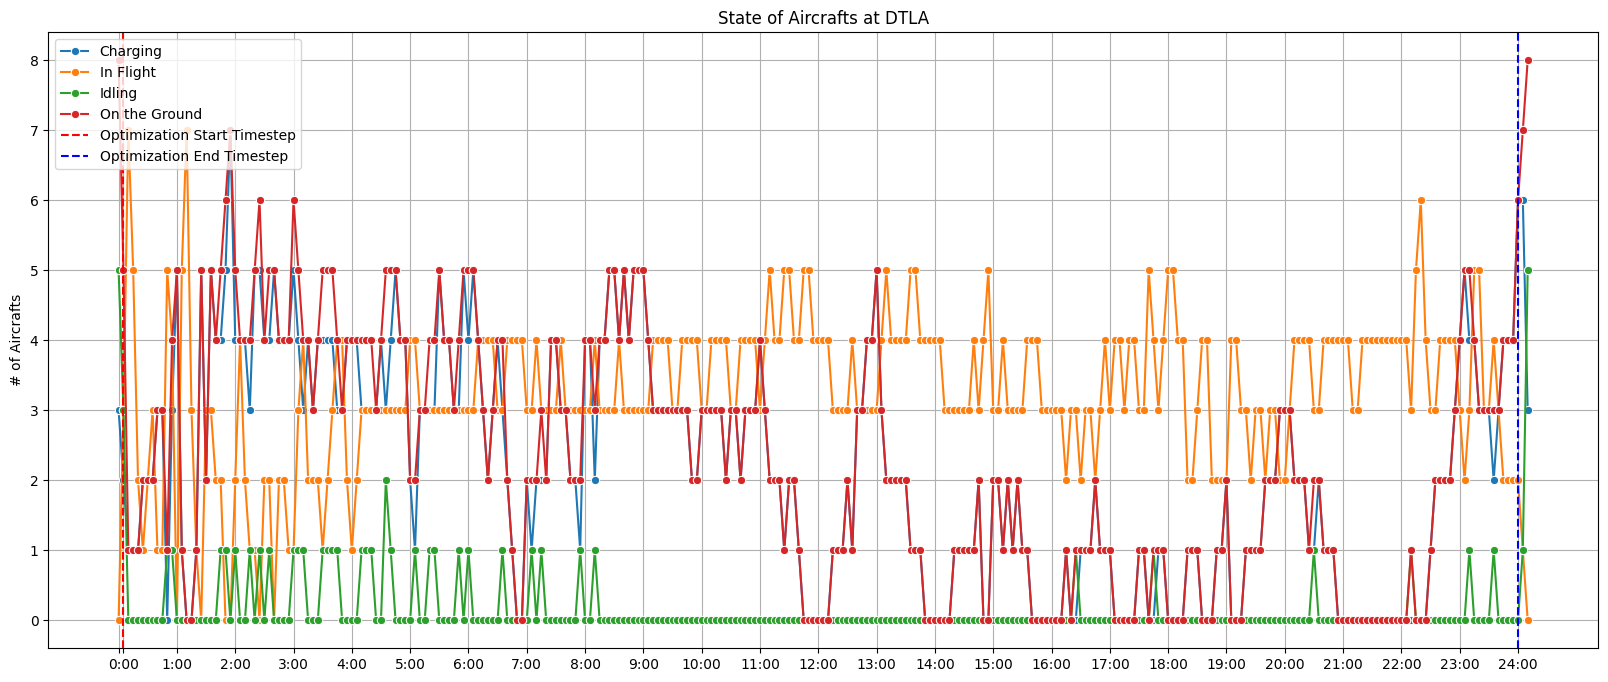

In [8]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(dtla_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax, marker='o')
sns.lineplot(dtla_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax, marker='o')
sns.lineplot(dtla_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax, marker='o')
sns.lineplot((dtla_all_c.sum(axis=0)[x0:x1] + dtla_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax, marker='o')
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at DTLA',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
plt.grid()

In [9]:
print('At t = 0, c =', dtla_all_c.sum(axis=0)[x0:x1][0], '; u=', dtla_all_u.sum(axis=0)[x0:x1][0], '; n=', dtla_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', dtla_all_c.sum(axis=0)[x0:x1][290], '; u=', dtla_all_u.sum(axis=0)[x0:x1][290], '; n=', dtla_all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 3.0 ; u= 0.0 ; n= 5.0
At t = 290, c = 3.0 ; u= 0.0 ; n= 5.0


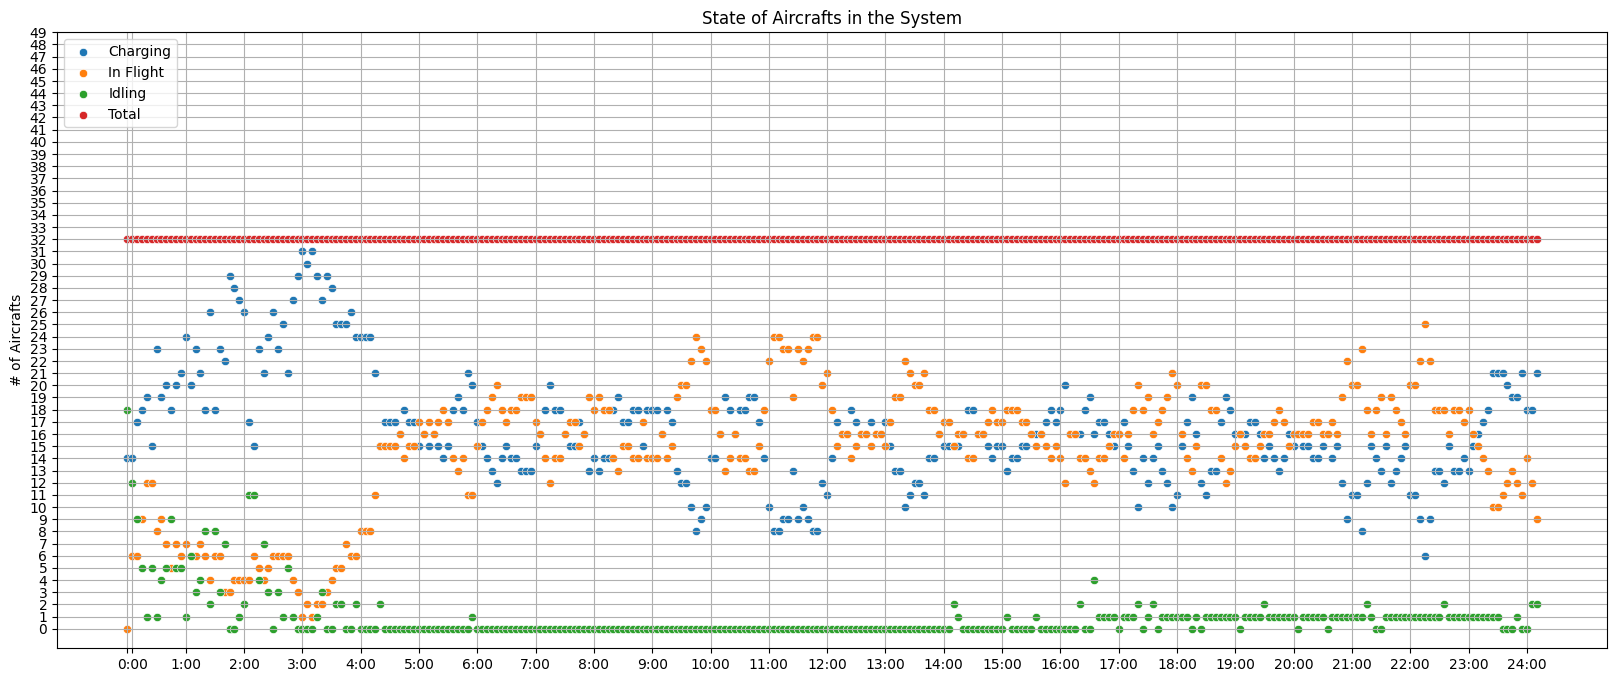

In [25]:
x0=0
x1=291

fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.scatterplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.scatterplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.scatterplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
# ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
# ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       yticks=np.arange(0, 50),
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.grid()
plt.legend(loc='upper left');
# plt.xlim([0, 10])

In [11]:
print('At t = 0, c =', all_c.sum(axis=0)[x0:x1][0], '; u=', all_u.sum(axis=0)[x0:x1][0], '; n=', all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', all_c.sum(axis=0)[x0:x1][290], '; u=', all_u.sum(axis=0)[x0:x1][290], '; n=', all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 4.0 ; u= 0.0 ; n= 7.0
At t = 290, c = 4.0 ; u= 0.0 ; n= 7.0


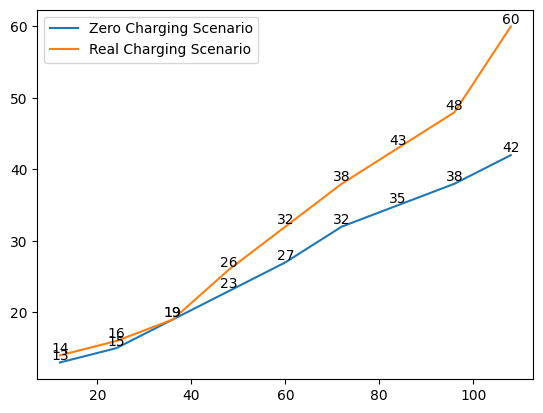

In [1]:
import matplotlib.pyplot as plt

x1 = [12, 24, 36, 48, 60, 72, 84, 96, 108]
y = [13, 15, 19, 23, 27, 32, 35, 38, 42]
z = [14, 16, 19, 26, 32, 38, 43, 48, 60]

plt.plot(x1, y, label='Zero Charging Scenario')
plt.plot(x1, z, label='Real Charging Scenario')

for i, j in zip(x1, y):
    plt.text(i, j, str(j), ha='center', va='bottom')

for i, j in zip(x1, z):
    plt.text(i, j, str(j), ha='center', va='bottom')

plt.legend()
plt.show()
